## Observations and Insights 

In [115]:
# Dependencies and Setup
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import scipy.stats as st
    print("All Modules Loaded!")
except:
    try:
        print("Module has failed to load. Trying to download.")
        !pip install pandas
        !pip install numpy
        !pip install matplotlib
    except:
        print("Could not load a module... sorry")

All Modules Loaded!


In [15]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [16]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [48]:
# Combine the data into a single dataset
mouse_study_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
mouse_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [18]:
# Checking the number of mice.
mice_count = len(mouse_study_data['Mouse ID'].unique())
mice_count

249

In [19]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mice = [m_id
             # for the dataframe grouped by Mouse ID's, grab the Series Timepoint
             for m_id, timepoint in mouse_study_data.groupby('Mouse ID')['Timepoint'] 
             # if the timepoint's value counts have a max that is greater than one
             # then add that to the list, meaning if they have ANY duplicate Timepoints
             # then they must be a duplicate
             if timepoint.value_counts().max() > 1]
dupe_mice

['g989']

In [20]:
# Optional: Get all the data for the duplicate mouse ID. 
data_dupe_mice = mouse_study_data.loc[mouse_study_data['Mouse ID'].isin(dupe_mice)]
data_dupe_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# this loop is to ignore this if the indexes have already been removed
for dupe_index in data_dupe_mice.index:
    if (dupe_index in mouse_study_data.index):
        mouse_study_data.drop(data_dupe_mice.index, inplace=True)
        break
mouse_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(mouse_study_data['Mouse ID'].unique())
mice_count

248

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM (standard error of the mean) of the tumor volume for each regimen 

# Use groupby and summary statistical methods to calculate the following 
# properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_regimen_columns = [['mean','median','var','std','sem'],
                        ['Mean','Median','Variance','Standard Deviation','SEM']]
drug_regimen_data = mouse_study_data.groupby(
    'Drug Regimen')['Tumor Volume (mm3)'].agg(drug_regimen_columns[0])
drug_regimen_data.columns = drug_regimen_columns[1]
drug_regimen_data

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [100]:
# Generate a bar plot showing the total number of measurements taken 
# on each drug regimen using pandas.

def get_total_measurements_per_regimen(data):
    drug_reg = 'Drug Regimen'
    df = pd.DataFrame()
    for name, group in mouse_study_data.groupby(drug_reg):
        measurements = 0
        # add 5 measurements per unique mouse
        # one for Mouse ID, Drug Regimen, Sex, Age_months, and Weight (g)
        measurements += group['Mouse ID'].nunique() * 5
        # add the non-null values for Timepoint
        measurements += group['Timepoint'].count()
        # add the non-null values for Tumor Volume (mm3)
        measurements += group['Tumor Volume (mm3)'].count()
        # add the non-null values for Metastatic Sites
        measurements += group['Metastatic Sites'].count()
        total_df = pd.DataFrame({drug_reg: [name],
                              'Total Measurements Taken': measurements})
        df = pd.concat([df, total_df])
    return df.set_index(drug_reg)

total_measurements_per_regimen = get_total_measurements_per_regimen(mouse_study_data)
total_measurements_per_regimen

,Total Measurements Taken
Drug Regimen,
Capomulin,815
Ceftamin,659
Infubinol,659
Ketapril,689
Naftisol,683
Placebo,668
Propriva,608
Ramicane,809
Stelasyn,663


<AxesSubplot:xlabel='Drug Regimen'>

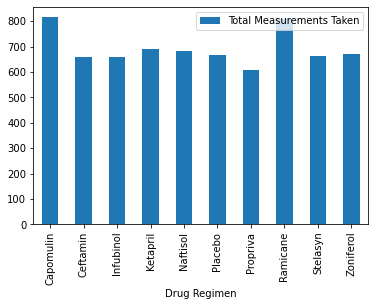

In [107]:
# Generate a bar plot using Pandas's `DataFrame.plot()`
total_measurements_per_regimen.plot.bar()

<BarContainer object of 4 artists>

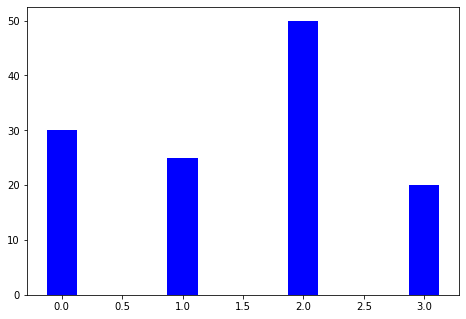

In [117]:
# Generate a bar plot using Matplotlib's `pyplot`
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)

In [10]:
# Generate a bar plot showing the total number of measurements
# taken on each drug regimen using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each
# mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


## What did we learn?
Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.